In [138]:
a="Learning CBOW"

In [139]:
import numpy as np
import pandas as pd

import re
import nltk


In [140]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [141]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [142]:
import opendatasets as od

In [143]:
df=pd.read_csv("C:\StreamlineProject\Restaurant_Reviews.csv")

In [144]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [145]:
l1=[]
for i in range(len(df)):
    text=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    text=text.lower()
    text=text.split()
    text=[ps.stem(word) for word in text if word not in set(stopwords.words("english")) ]
    text=' '.join(text)
    l1.append(text)

l1[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [146]:
l1

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happier',


# CountVectorizer Bag of Words

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000)
X=cv.fit_transform(l1).toarray()
Y=df.iloc[:,1].values

In [148]:
Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [149]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [150]:
X.shape

(1000, 1563)

In [151]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt




Text(0.5, 1.0, 'Liked')

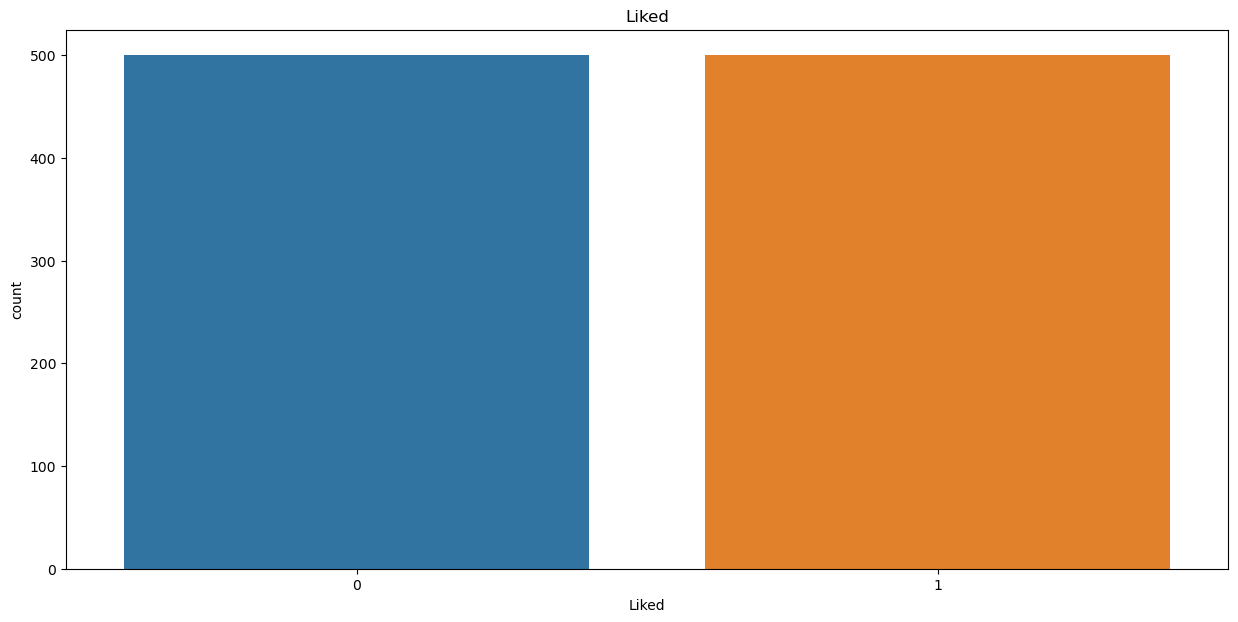

In [153]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Liked'])
plt.title('Liked')

In [154]:
df['Liked'].value_counts()[0]

500

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [157]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [158]:
y_pred=gnb.predict(X_test)

In [159]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [160]:
print("score :", gnb.score(X_test,y_test))

score : 0.725


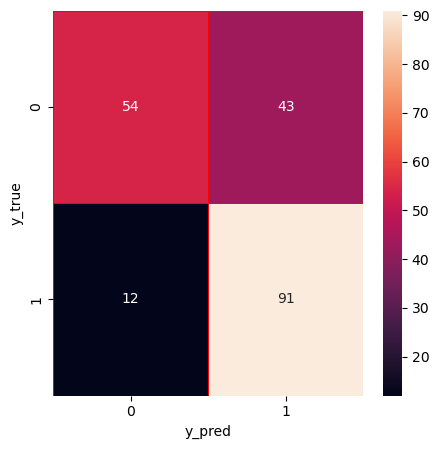

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [162]:
import pandas as pd
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import  stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
import pandas as pd
import seaborn as sns



In [164]:
import nltk as nlp 
lemma=nlp.WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [165]:
df1=pd.read_csv("C:\StreamlineProject\gender-classifier-DFE-791531.csv",encoding="latin1")

In [166]:
df1.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [167]:
df1.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [168]:
data1=df1[['gender','description']]

In [169]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       19953 non-null  object
 1   description  16306 non-null  object
dtypes: object(2)
memory usage: 313.4+ KB


In [170]:
data1.isnull().sum()

gender           97
description    3744
dtype: int64

In [174]:
print(f"Before encoding and removing na vlaues {data1.head}")
data1.dropna(axis=0,inplace=True)
data1.gender=[1 if each=='female' else 0 for each in data1.gender]
print(f" The data after encdoing and remvoing the missing the values {data1.head()}")

Before encoding and removing na vlaues <bound method NDFrame.head of        gender                                        description
0        male                              i sing my own rhythm.
1        male  I'm the author of novels filled with family dr...
2        male                louis whining and squealing and all
3        male  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4      female  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...       ...                                                ...
20045  female                                               (rp)
20046    male  Whatever you like, it's not a problem at all. ...
20047    male  #TeamBarcelona ..You look lost so you should f...
20048  female  Anti-statist; I homeschool my kids. Aspiring t...
20049  female                     Teamwork makes the dream work.

[16224 rows x 2 columns]>
 The data after encdoing and remvoing the missing the values    gender                                        description
0 

C:\Users\nasim\AppData\Local\Temp\ipykernel_24052\1544843018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(axis=0,inplace=True)
C:\Users\nasim\AppData\Local\Temp\ipykernel_24052\1544843018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.gender=[1 if each=='female' else 0 for each in data1.gender]


In [175]:
data1.head()

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [176]:
list_vocab=[]
for i in data1.description:
    data=re.sub("[^a-zA-Z]"," ",i)
    data=data.lower()
    data=nltk.word_tokenize(data)
    data=[word for word in data if not word in set(stopwords.words("english"))]
    lemma=nlp.WordNetLemmatizer()
    data=[lemma.lemmatize(word) for word in data]
    data=" ".join(data)
    list_vocab.append(data)
list_vocab


['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx',
 'know',
 'global marketplace image video music sharing photo inspiration design tip video creative community',
 'secret getting ahead getting started',
 'pll fan crazy mcd ramen bae',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow',
 'clean food taste great providing energy nutrient guilt granola vegan paleo friendly option cert organic gf kosher',
 'highly extraordinary auction',
 'senior xi xii mmxiv',
 'come join fastest blog network online today http co mfpa vgk http co mpuuqtyf g cover credit repair credit card bankruptcy',
 'im p bo burnham disney world',
 

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=5000
count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=count_vectorizer.fit_transform(list_vocab).toarray()
print(f"{max_features,count_vectorizer.get_feature_names_out()[0:5]}")
y=data1.iloc[:,0].values
x=sparce_matrix


(5000, array(['aa', 'aaron', 'ab', 'abacus', 'abc'], dtype=object))


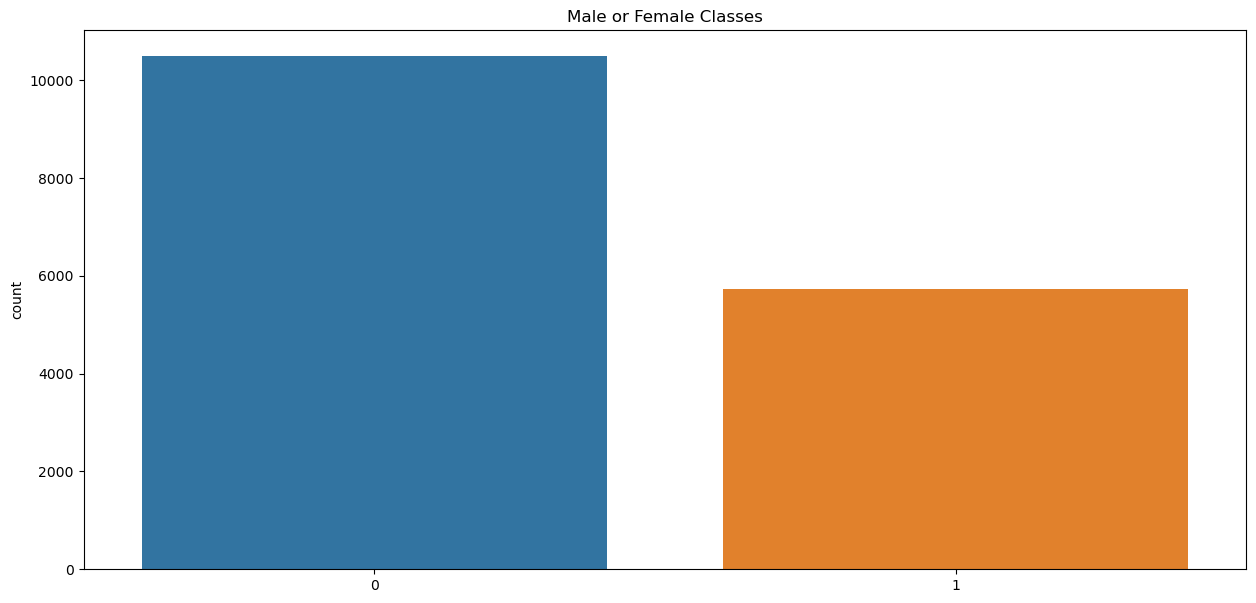

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.countplot(x=y)
plt.title("Male or Female Classes")
plt.show()

In [183]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [185]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [186]:
y_pred=nb.predict(X_test)

In [187]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [188]:
cm=confusion_matrix(y_test,y_pred)

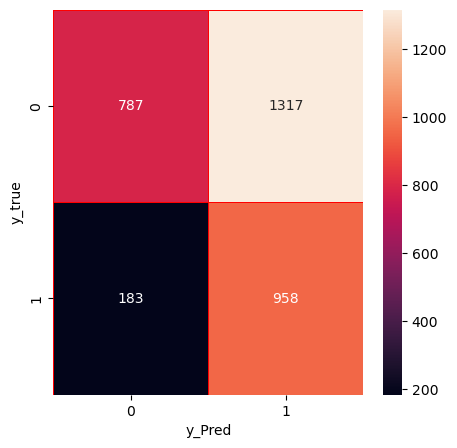

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_Pred")
plt.ylabel("y_true")
plt.show()

# 3. NLTK - Word2vEC(SKIPgRAM, cbow)-Glove

In [191]:
from nltk.tokenize import sent_tokenize, word_tokenize
text = '''Alan Mathison Turing was an English computer scientist,' \
 mathematician, logician, cryptanalyst, philosopher, and theoretical biologist. Turing was highly influential in the development of theoretical computer science, providing a formalisation of the concepts of algorithm and computation with the Turing machine, which can be considered a model of a general purpose computer.
   Turing is widely considered to be the father of theoretical computer science and artificial intelligence.'''

In [193]:
text.split()[0:10]

['Alan',
 'Mathison',
 'Turing',
 'was',
 'an',
 'English',
 'computer',
 "scientist,'",
 'mathematician,',
 'logician,']

In [194]:
word_tokenize(text)[0:10]

['Alan',
 'Mathison',
 'Turing',
 'was',
 'an',
 'English',
 'computer',
 'scientist',
 ',',
 "'"]

In [195]:
sent_tokenize(text)[0:10]

["Alan Mathison Turing was an English computer scientist,'  mathematician, logician, cryptanalyst, philosopher, and theoretical biologist.",
 'Turing was highly influential in the development of theoretical computer science, providing a formalisation of the concepts of algorithm and computation with the Turing machine, which can be considered a model of a general purpose computer.',
 'Turing is widely considered to be the father of theoretical computer science and artificial intelligence.']

# NLTK STOPWORDS

In [197]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [198]:
text='''
Fazıl Say is a Turkish pianist and composer who was born in Ankara, described recently as "not merely a pianist of genius; but undoubtedly he will be one of the great artists of the twenty-first century
'''

In [199]:
stopwords=stopwords.words("english")
print(stopwords[0:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [200]:
words=word_tokenize(text)
filtered_word=[]
for word in words:
    if word not in stopwords:
        if word not in filtered_word:
            filtered_word.append(word)
filtered_word[0:10]

['Fazıl',
 'Say',
 'Turkish',
 'pianist',
 'composer',
 'born',
 'Ankara',
 ',',
 'described',
 'recently']

# NLTK Stemmer

In [203]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

words = ['drive', 'driving', 'driver', 'drives', 'drove', 'cats', 'children']

for w in words:
    print(f"{w}  is -----> {ps.stem(w)}")

drive  is -----> drive
driving  is -----> drive
driver  is -----> driver
drives  is -----> drive
drove  is -----> drove
cats  is -----> cat
children  is -----> children
